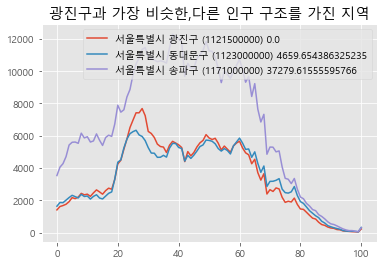

In [90]:
#인구 구조
import numpy as np
import csv
import matplotlib.pyplot as plt
import math

f=open('population.csv')
data=csv.reader(f)
head=next(data)
pop=[]
gwanggin=[]
for f in data:
    if(f[0]=="서울특별시  (1100000000)"):
        continue
        
    if(f[0]=="서울특별시 광진구 (1121500000)"):
        gwanggin=f
    pop.append(f)
pop=np.array(pop)
gwanggin=np.array(gwanggin)
sum=0
min=9999999999
minindex=0
max=0
maxindex=0
result=[]
#문자열이 있는 열이 있어서 하나씩 계산했습니다
for i in range(pop.shape[0]):
    for j in range(3,pop.shape[1]):
        pop[i][j]=pop[i][j].replace(',','')
        gwanggin[j]=gwanggin[j].replace(',','')
        sum+=((int(pop[i][j])-int(gwanggin[j]))**2)
    result.append([pop[i][0],sum])
    if(sum==0): #광진구
        sum=0
        continue
    if(sum>max):
        max=sum
        maxindex=i
    if(sum<min):
        min=sum
        minindex=i
    sum=0
    
#광진구의 위치는 알고 있다고 가정 1번째 알고리즘이 지역 선택이었으니까

gg=np.array(gwanggin[3:105],dtype='uint16')
gglabel=str(result[4][0])+" "+str(math.sqrt(result[4][1]))
low=np.array(pop[minindex][3:105],dtype='uint16')
lowlabel=str(result[minindex][0])+" "+str(math.sqrt(result[minindex][1]))
high=np.array(pop[maxindex][3:105],dtype='uint16')
highlabel=str(result[maxindex][0])+" "+str(math.sqrt(result[maxindex][1]))

plt.rc('font',family="Malgun Gothic")
plt.style.use('ggplot')
plt.title("광진구과 가장 비슷한,다른 인구 구조를 가진 지역")
plt.plot(gg,label=gglabel)
plt.plot(low,label=lowlabel)
plt.plot(high,label=highlabel)
plt.legend()
plt.show()